In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#한글 깨짐 현상 방지 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

#한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [9]:
# 데이터 불러오기
df1 = pd.read_csv('/content/drive/MyDrive/2023/인구/사망율연도별합계.csv',encoding = "euc-kr", engine='python')
df1

연도별    인구수
0  2016년  14119
1  2017년  14290
2  2018년  15316
3  2019년  15131
4  2020년  15689

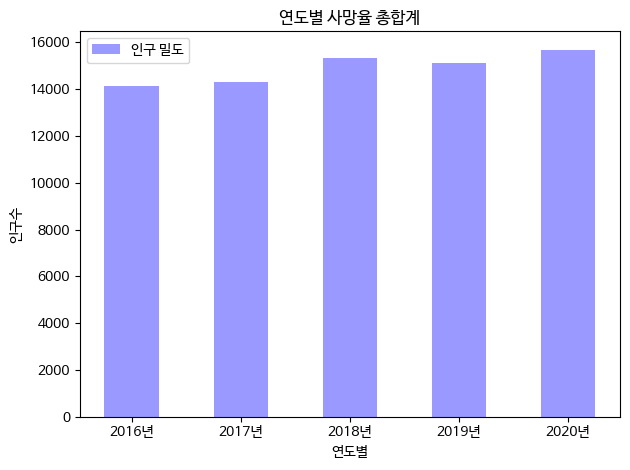

In [11]:
#히스토그램 그리기 - 연도별 합계 비교그래프

#특정 열 값들을 리스트로 변환
area = df1['연도별']
human = df1['인구수']

index = np.arange(len(human))
bar_width = 0.5
opacity = 0.4
error_config = {'ecolor': '0.3'}
rects1 = plt.bar(index, human, bar_width, alpha=opacity, color='b',
                 yerr=None,error_kw=error_config,label='인구 밀도')

plt.xlabel('연도별')
plt.ylabel('인구수')
plt.title('연도별 사망율 총합계')
plt.xticks(index, area)
plt.legend()
plt.tight_layout()

plt.show()

In [15]:
# 데이터 불러오기
road = pd.read_csv('/content/drive/MyDrive/2023/인구/사망율 연령별 합계.csv',encoding = "euc-kr", engine='python')
road

연령별  2016  2017  2018  2019  2020
0     0 - 4세    88    87    81    74    55
1     5 - 9세    11    12    15    16    11
2   10 - 14세     6    13    14     7    17
3   15 - 19세    43    24    39    32    36
4   20 - 24세    67    56    69    66    64
5   25 - 29세    69    71    93    81   101
6   30 - 34세   142   108   115   120   126
7   35 - 39세   165   179   191   194   193
8   40 - 44세   303   269   259   266   275
9   45 - 49세   516   465   505   446   437
10  50 - 54세   718   677   637   682   611
11  55 - 59세  1016   969   997  1022   971
12  60 - 64세   934  1036  1150  1081  1241
13  65 - 69세  1046   967  1119  1101  1162
14  70 - 74세  1430  1390  1388  1345  1387
15  75 - 79세  1976  2019  2134  2057  2073
16  80 - 84세  2209  2348  2485  2496  2542
17  85 - 89세  1871  1951  2140  2129  2306
18     90세이상  1504  1649  1884  1914  2079

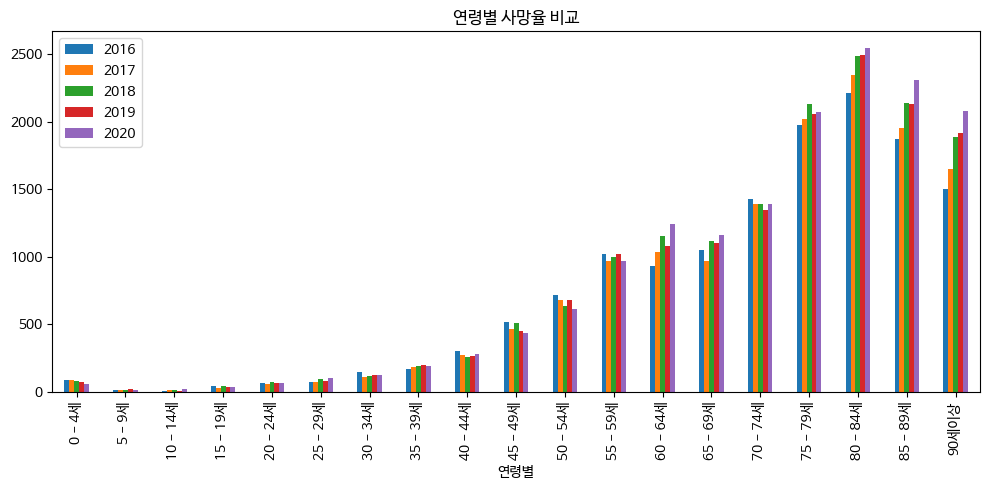

In [16]:
# 지역을 인덱스로 설정
road.set_index('연령별', inplace=True)

# 그래프 그리기
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
road.plot(kind='bar', ax=ax)
ax.set_title('연령별 사망율 비교')
plt.tight_layout()
plt.show()